# 81  画像データの読み込み

In [ ]:
#! $ pip install opencv-python

画像幅: 1920
画像高さ: 1440


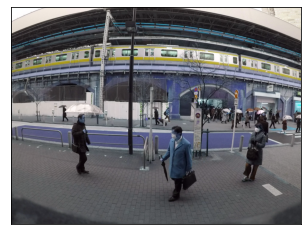

In [2]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("img/img01.jpg")
height, width = img.shape[:2]
print("画像幅: "+str(width))
print("画像高さ: "+str(height))

#cv2.imshow("img", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# 82 映像データの読み込み

In [ ]:
import cv2

cap = cv2.VideoCapture("mov/mov01.avi")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print("画像幅: "+str(width))
print("画像高さ: "+str(height))
print("総フレーム数: "+str(count))
print("FPS: "+str(fps))

# 出力
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        a = 0
        #cv2.imshow("frame", frame)
    #if cv2.waitKey(1) & 0xFF == ord("q"):
    #    break
    else:
        cap.release()
cap.release()
#cv2.destroyAllWindows()

# 83 映像を画像に分割して保存

In [ ]:
import cv2

cap = cv2.VideoCapture("mov/mov01.avi")
num = 0
# 出力
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        filepath = "snapshot/snapshot_"+str(num)+".jpg"
        cv2.imwrite(filepath, frame)
    else:
        cap.release()
    num += 1

cap.release()

# 84 画像内のどこに人がいるかを検出する

In [ ]:
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {
    "winStride":(8,8), 
    "padding":(32,32),
    "scale":1.05,
    "hitThreshold":0,
    "finalThreshold":5
}

img = cv2.imread("img/img01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,255,255), 3)


plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# 85 画像内の人物、顔検出

In [ ]:
import cv2

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("img/img02.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
face_list = cascade.detectMultiScale(gray, minSize=(50,50))

for (x, y, w, h) in face_list:
    color = (255,0,0)
    pen_w = 3
    cv2.rectangle(img, (x, y), (x+w, y+h), color,thickness=pen_w)

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()    

# 86 画像内の人がどこに顔を向けているのかの検出

In [ ]:
# ! apt-get update

In [ ]:
# ! apt-get install libboost-all-dev -y

In [ ]:
# ! apt-get install -y cmake

In [ ]:
# ! apt-get install -y build-essential

In [ ]:
# ! apt-get install -y libx11-dev

In [ ]:
# ! apt-get install -y libopenblas-dev liblapack-dev

In [ ]:
# ! pip3 install dlib

theta:0.06456096931747406 (radian:3.6990710631648662)
  right 3.7 deg.


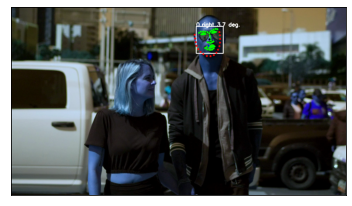

In [17]:
import cv2
import dlib
import math

# 検出モデル
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

img = cv2.imread("img/img02.jpg")
# 正面向きの顔検出
dets = detector(img, 1)
for k, d in enumerate(dets):
    #顔器官の検出
    shape = predictor(img, d)
    
    #face area
    color_f = (0,0,225)
    color_l_out = (255,0,0)
    color_l_in = (0,255,0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), 
                 (255,255,255), line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, (255,255,255), line_w)
    
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        #print("No.{} position: ({},{})".format(shape_point_count, shape_point.x, shape_point.y))
        if shape_point_count < num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
            gx_out = gx_out + shape_point.x / num_of_points_out
            gy_out = gy_out + shape_point.y / num_of_points_out
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r,color_l_in, line_w)
            gx_in = gx_in + shape_point.x / num_of_points_in
            gy_in = gy_in + shape_point.y / num_of_points_in

    cv2.circle(img, (int(gx_out),int(gy_out)),circle_r,(0,0,255), line_w)
    cv2.circle(img, (int(gx_in),int(gy_in)),circle_r,(0,0,0), line_w)

    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta*180/math.pi
    print("theta:{} (radian:{})".format(theta,radian))
    
    if radian<0:
        textPrefix = "  left "
    else:
        textPrefix = "  right "
    textShow = textPrefix + str(round(abs(radian),1)) + " deg."
    print(textShow)
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, (255,255,255), line_w)
    
    
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()    

# 87 検出した情報の統合

In [19]:
import cv2

print("タイムラプス生成を開始します")

# 映像取得 #
cap = cv2.VideoCapture("mov/mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

# タイムラプス作成 #
movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name,fourcc, 30, (width,height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)

            video.write(frame)
    else:
        break
    num = num + 1
video.release()
cap.release()
cv2.destroyAllWindows()
print("タイムラプス生成を終了しました")

タイムラプス生成を開始します
タイムラプス生成を終了しました


# 88 全体像をグラフにして可視化

In [ ]:
import cv2
import pandas as pd

print("分析を開始します")
# 映像取得 #
cap = cv2.VideoCapture("mov/mov01.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

num = 0
list_df = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df.columns )
            list_df = list_df.append( tmp_se, ignore_index=True )       
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num = num + 1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")

分析を開始します


In [ ]:
import matplotlib.pyplot as plt
plt.plot(list_df["time"], list_df["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()